**Dudas**

* Cómo hago para saber el ID del cliente una vez que se hace la predicción con vecinos cercanos

df.reset_index(inplace=True)
df.rename(columns={'index': 'ID_Cliente'}, inplace=True)


* Cómo hago con vecinos cercanos para predecir la aceptación de una campaña 6 por ejemplo?

* Revisar Outliers

**Julio:**

Matriz correlación análisis y conclusiones

Que porcentaje de clientes aceptaron alguna campaña?

Regla de Asociación

Nota: Si ves q hay un error al momento de intentar usar el modelo puede ver xq hay datos categóricos y no solo numéricos. Podes intentar con: df = df.select_dtypes(include='number')


**Mica:**

Arbol de decisión

OBJETIVO 1:

Encontrar cuales compradores tienen más probabilidad de aceptar una promoción de manera virtual para enviarles especialmente a ellos email.

Qué características tiene estos clientes?

OBJETIVO 2:

Encontrar cuales clientes tiene más probabilidad de comprar con un cupón que se les puede enviar por correo (físico).

Qué características tiene estos clientes?


OTRA OPCIÓN:
La empresa quiere incrementa las ventas de "algo", que conviene hacer?


Fuente de datos:
https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign



Context

A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service

Content

AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise

Complain - 1 if customer complained in the last 2 years

DtCustomer - date of customer’s enrolment with the company

Education - customer’s level of education

Marital - customer’s marital status

Kidhome - number of small children in customer’s household


Teenhome - number of teenagers in customer’s household


Income - customer’s yearly household income

MntFishProducts - amount spent on fish products in the last 2 years

MntMeatProducts - amount spent on meat products in the last 2 years

MntFruits - amount spent on fruits products in the last 2 years

MntSweetProducts - amount spent on sweet products in the last 2 years

MntWines - amount spent on wine products in the last 2 years

MntGoldProds - amount spent on gold products in the last 2 years

NumDealsPurchases - number of purchases made with discount

NumCatalogPurchases - number of purchases made using catalogue

NumStorePurchases - number of purchases made directly in stores

NumWebPurchases - number of purchases made through company’s web site

NumWebVisitsMonth - number of visits to company’s web site in the last month

Recency - number of days since the last purchase


Acknowledgements

O. Parr-Rud. Business Analytics Using SAS Enterprise Guide and SAS Enterprise Miner. SAS Institute, 2014.

Inspiration

The main objective is to train a predictive model which allows the company to maximize the profit of the next marketing campaign.

# 1. Base de datos

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [196]:
archivo = 'marketing_campaign.xlsx'

df= pd.read_excel(archivo)

print(df.head(10))

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   
5  7446        1967      Master       Together  62513.0        0         1   
6   965        1971  Graduation       Divorced  55635.0        0         1   
7  6177        1985         PhD        Married  33454.0        1         0   
8  4855        1974         PhD       Together  30351.0        1         0   
9  5899        1950         PhD       Together   5648.0        1         1   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7           

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [198]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [199]:
df.shape

(2240, 29)

## Limpieza de datos

In [200]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [201]:
# Eliminar filas con valores faltantes
df.dropna(inplace=True)
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [202]:
#ver si hay datos duplicados
df.duplicated().sum()

0

In [203]:
# Los elimino y me quedo con la primera ocurrencia.
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [204]:
# Creo esto para trabajar con Tableau
df.to_excel('Marketing limpio.xlsx', index=False)

In [205]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [206]:
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
ID,2216.0,5588.353339,5458.5,3249.376275,0.0,2814.75,5458.5,8421.75,11191.0
Year_Birth,2216.0,1968.820397,1970.0,11.985554,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,51381.5,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.0,0.536896,0.0,0.00,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.0,0.544181,0.0,0.00,0.0,1.00,2.0
Recency,2216.0,49.012635,49.0,28.948352,0.0,24.00,49.0,74.00,99.0
MntWines,2216.0,305.091606,174.5,337.327920,0.0,24.00,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,8.0,39.793917,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,68.0,224.283273,0.0,16.00,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,12.0,54.752082,0.0,3.00,12.0,50.00,259.0


 Veo que hay años de nacimientos de 1893 por lo que se espera que esa persona no siga con vida ni comprando o puede ser un error. Se eliminan datos incoherentes, como anteriores a 1934 (personas mayores de 90 años no suele haber)

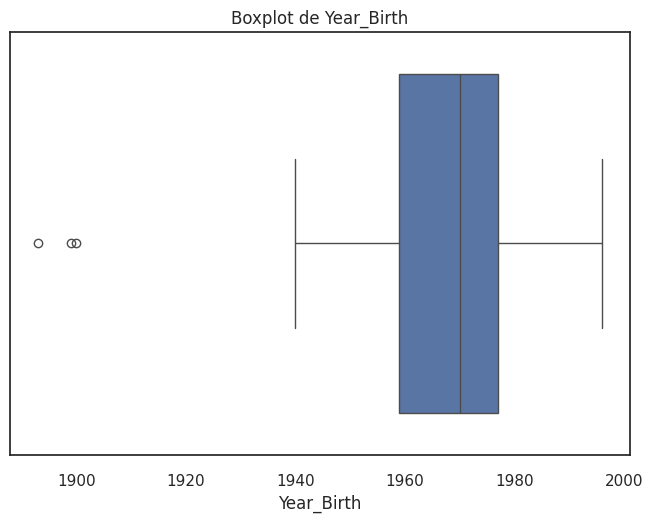

In [207]:
# Crea un boxplot de la variable "Year_Birth"
sns.boxplot(x=df['Year_Birth'])

# Añade etiquetas y título al gráfico
plt.xlabel('Year_Birth')
plt.title('Boxplot de Year_Birth')

# Muestra el gráfico
plt.show()

In [208]:
df = df[df['Year_Birth'] >= 1932]

igual para todas las variables:

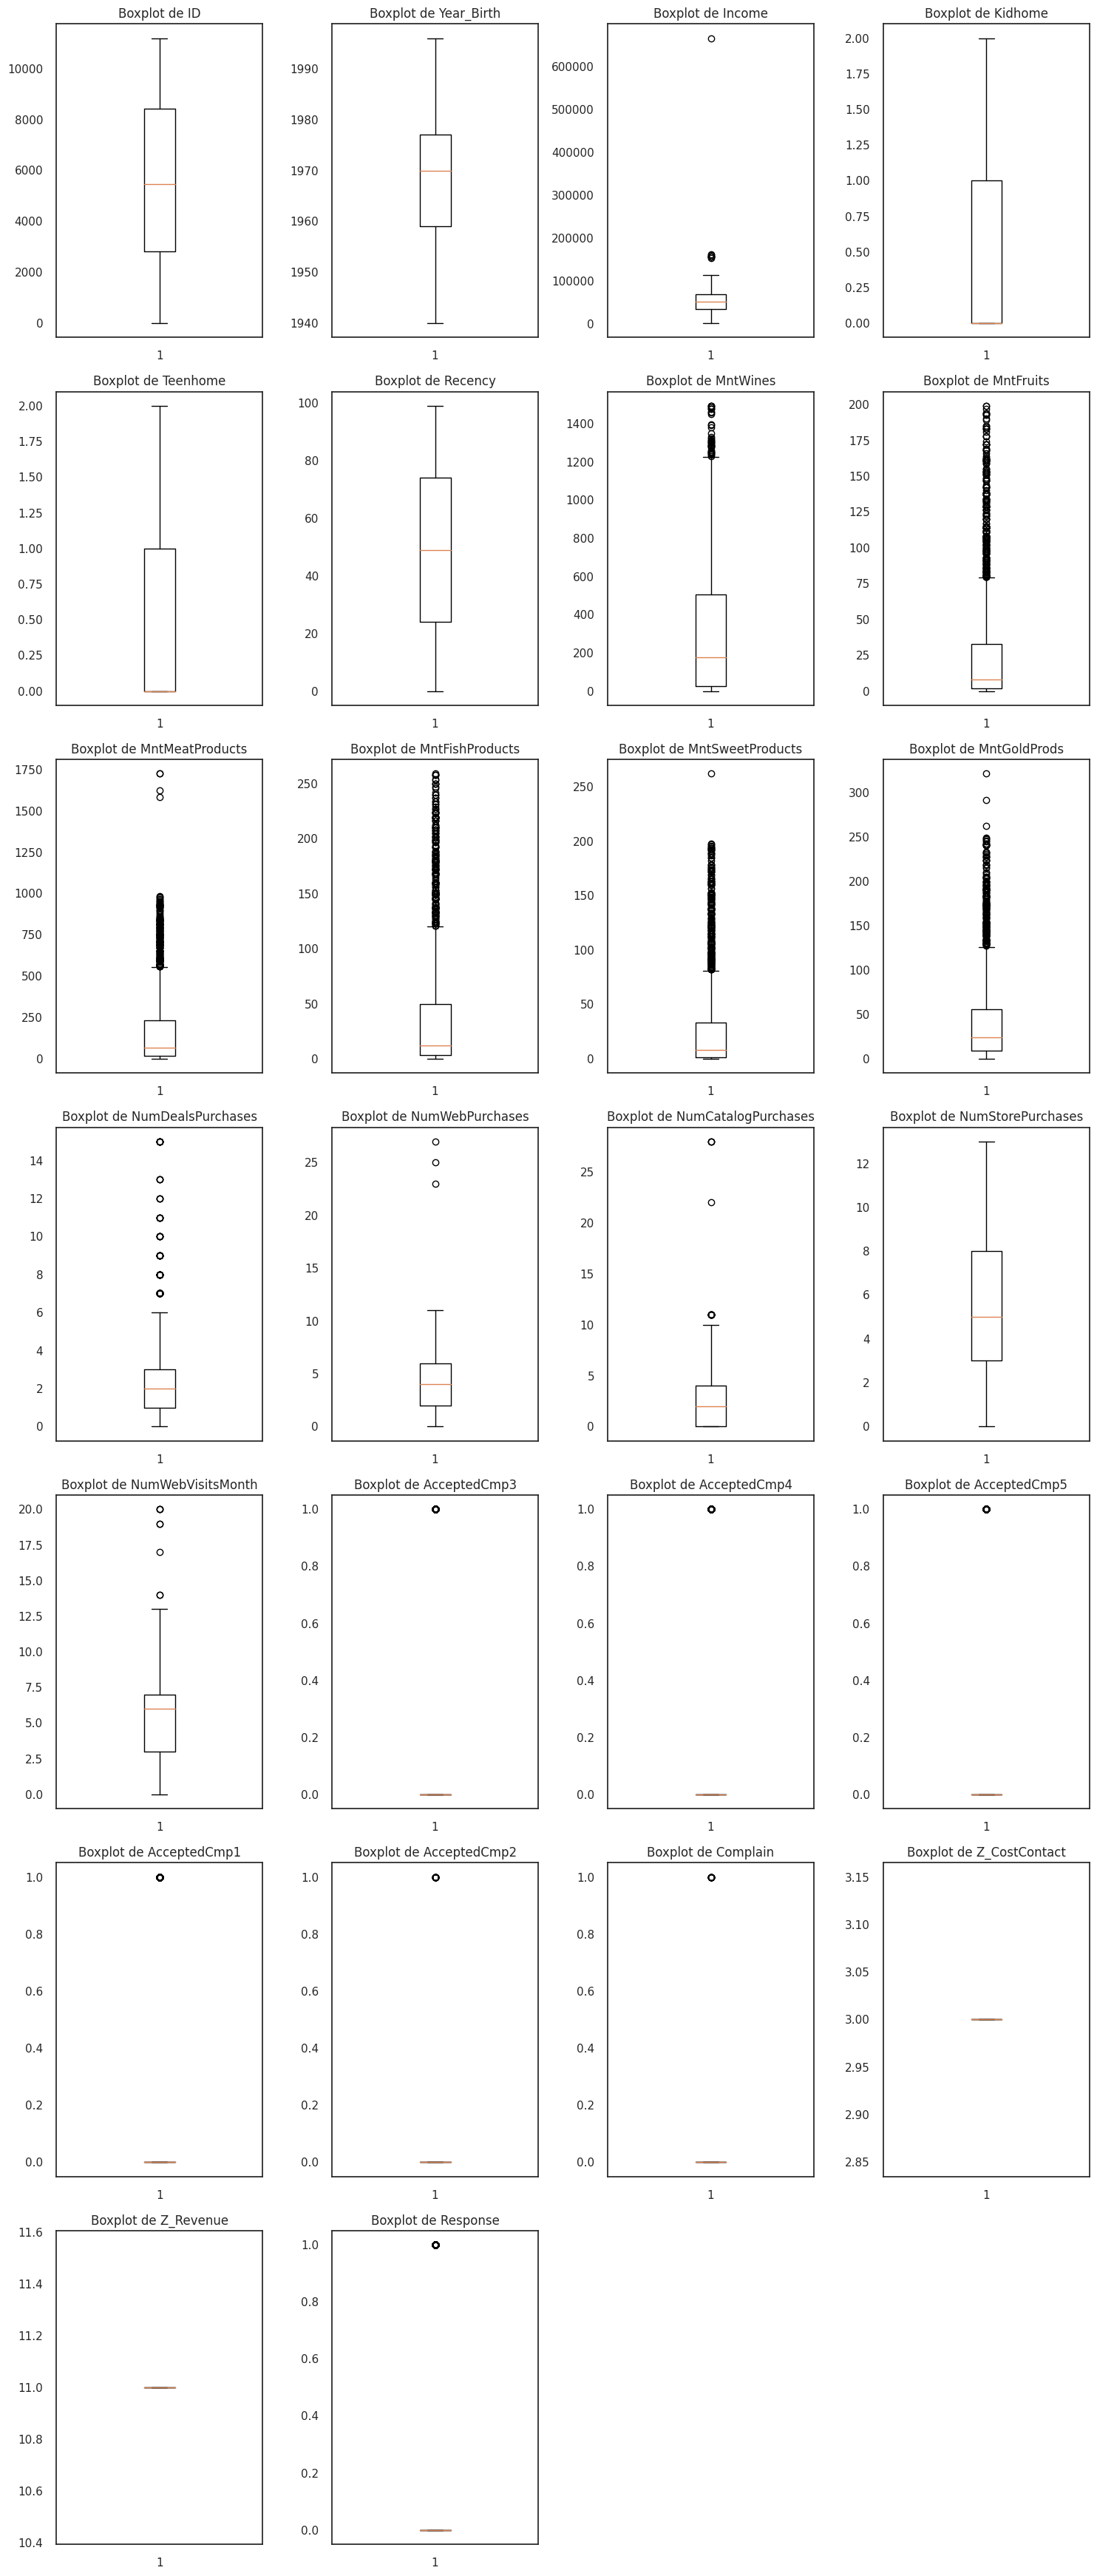

In [209]:
import math

df_num = df.select_dtypes(include='number')

# Calcula el número de filas y columnas para organizar las subgráficas
num_variables = len(df_num.columns)
num_rows = math.ceil(num_variables / 4)  # Ajusta según sea necesario
num_cols = min(4, num_variables)  # Ajusta según sea necesario

# Ajusta el tamaño del gráfico
plt.figure(figsize=(15, 5 * num_rows))

# Itera sobre las columnas y crea un boxplot para cada variable
for i, column in enumerate(df_num.columns):
    plt.subplot(num_rows, num_cols, i+1)
    plt.boxplot(df[column])
    plt.title(f'Boxplot de {column}')

# Ajusta el diseño
plt.tight_layout()

# Muestra el gráfico
plt.show()

In [210]:
# Income tiene un valor que es demasiado grande en comparación al resto, lo elimino
df = df[df['Income'] <= 200000]

# 'MntMeatProducts' También? No estoy segura
df = df[df['MntMeatProducts'] <= 1250]

In [211]:
# Elimino las columnas que tiene un solo valor
df = df.drop('Z_CostContact', axis=1)
df = df.drop('Z_Revenue', axis=1)

EDAD

In [212]:
df['edad']=2024-df['Year_Birth']

#making a new column age
df=df[df['edad']<80]
bins = [20,30,40,50,60,70]
names = ['<20','20-30',"30-40","40-50", "50-60",'>60']
d = dict(enumerate(names,1))
df['Rango_edad'] = np.vectorize(d.get)(np.digitize(df['edad'],bins))

In [213]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'edad', 'Rango_edad'],
      dtype='object')

In [214]:
df['Rango_edad'].value_counts()

40-50    668
30-40    549
50-60    459
>60      298
20-30    212
<20        7
Name: Rango_edad, dtype: int64

# 2. EDA

<ipython-input-215-348ed484693b>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



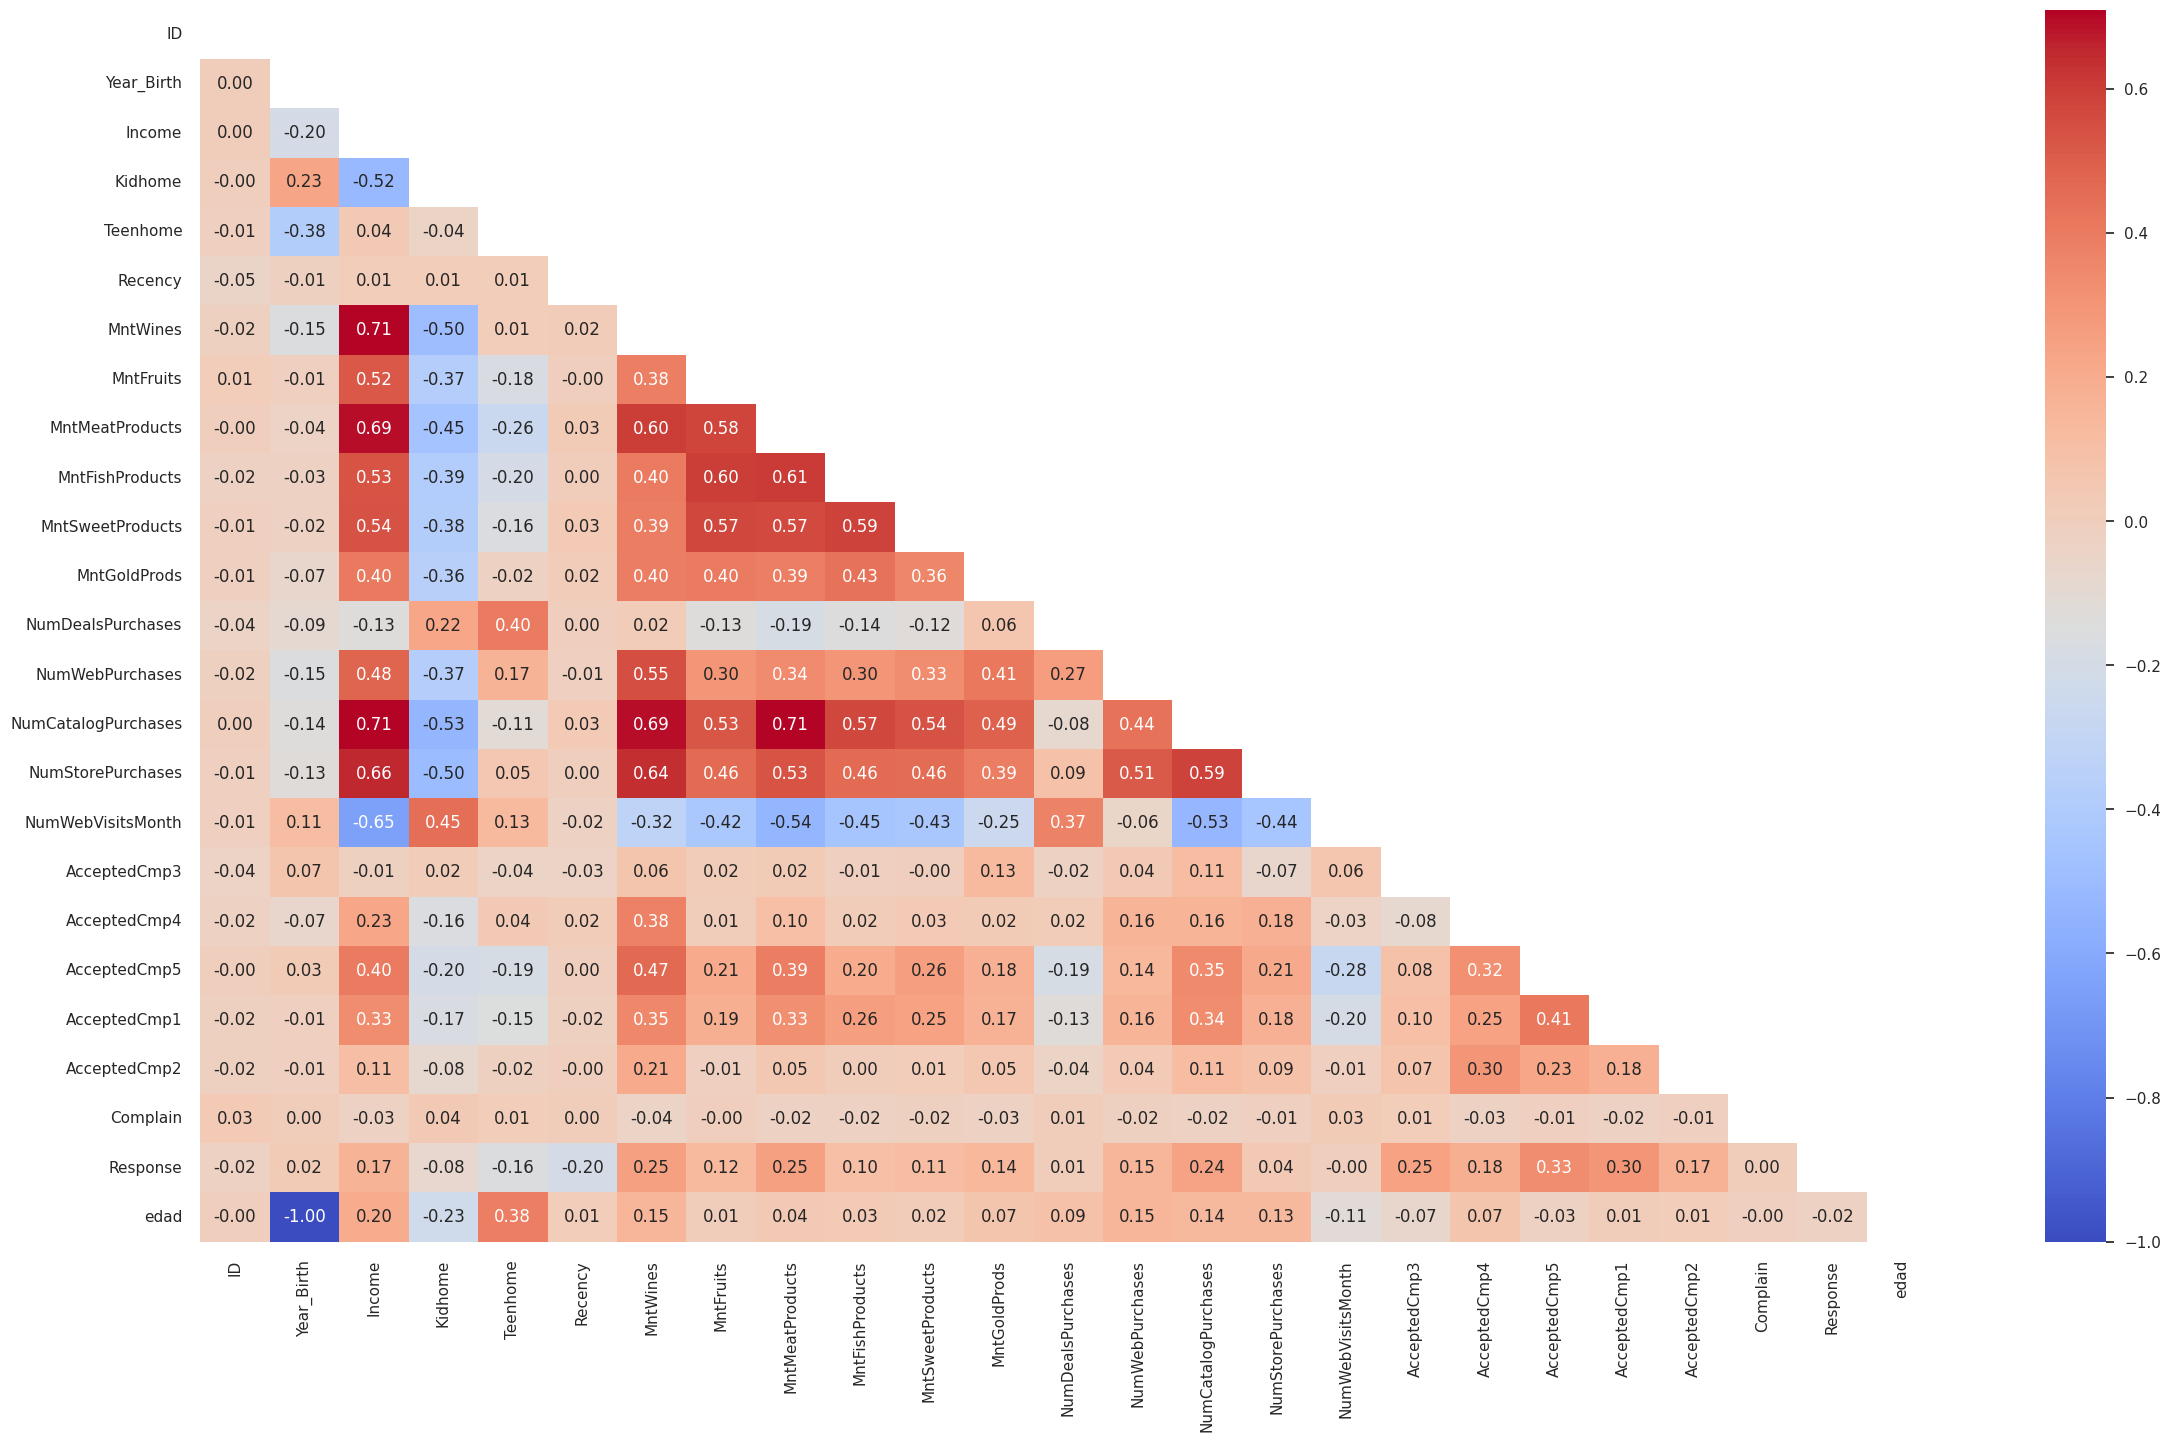

In [215]:
matriz_correlacion = df.corr()

# Crear un mapa de calor utilizando seaborn
sns.set(style="white")  # Configuración del estilo
mask = np.triu(np.ones_like(matriz_correlacion, dtype=bool))  # Máscara triangular superior

# Configurar el tamaño de la figura
plt.figure(figsize=(28, 16))

# Crear el mapa de calor
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)

# Mostrar el mapa de calor
plt.show()

First conclutions:

* The greatest relationship found is between people who buy from catalog and people who buy meat.

*

*

*

*

First questions:

* Porcentaje de personas que entran a la página / personas que compran virtual?

* Mediante cual método hay mayores ventas?  (Quiero un cuadro comparativo)

*

* (Objetivo 1) Cuántas personas que compran mayormente por la web aceptaron alguna campaña o compran con deal? Cuáles son?

* (Objetivo 2) Cuántas personas que compran mayormente en la tienda aceptaron alguna campaña o compran con deal? Cuáles son?

In [216]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'edad', 'Rango_edad'],
      dtype='object')

In [217]:
import pandas as pd

# Supongamos que tienes un DataFrame df y deseas eliminar las filas que contienen "YOLO" en la columna "Status"
df = df[df['Marital_Status'] != 'YOLO']

In [218]:
# Supongamos que tienes un DataFrame df y deseas ver las filas que contienen "Alone" en la columna 'Marital_Status'
filas_alone = df[df['Marital_Status'] == 'Alone']

# Mostrar las filas que contienen "Alone" en la columna 'Marital_Status'
print(filas_alone)

       ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
131   433        1958      Master          Alone  61331.0        1         1   
138  7660        1973         PhD          Alone  35860.0        1         1   
153    92        1988  Graduation          Alone  34176.0        1         0   

    Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
131  2013-03-10       42       534  ...                  8             0   
138  2014-05-19       37        15  ...                  5             1   
153  2014-05-12       12         5  ...                  6             0   

     AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
131             0             0             0             0         0   
138             0             0             0             0         0   
153             0             0             0             0         0   

     Response  edad  Rango_edad  
131         0    66       50-60  
138         1

In [219]:
cantidad_alone = (df['Marital_Status'] == 'Alone').sum()
print(cantidad_alone)

3


In [220]:
cantidad_absurd = (df['Marital_Status'] == 'Absurd').sum()
print(cantidad_absurd)

2


In [221]:
df= df[df['Marital_Status'] != 'Absurd']

In [222]:
df['Marital_Status'] = df['Marital_Status'].replace('Alone', 'Single')

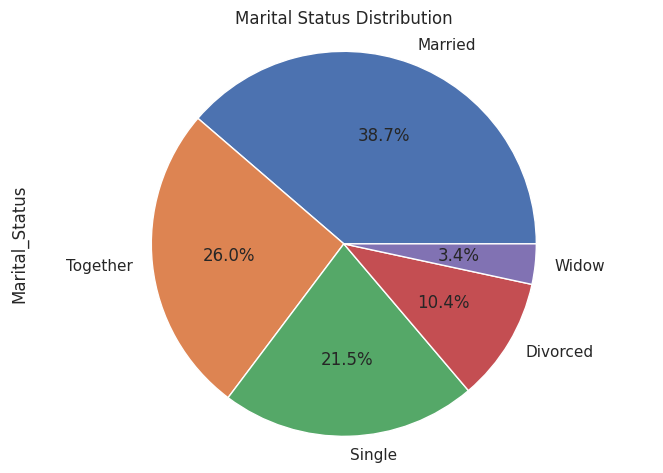

In [223]:
#Pie chart
df["Marital_Status"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.axis("equal")
plt.title("Marital Status Distribution")
plt.show()

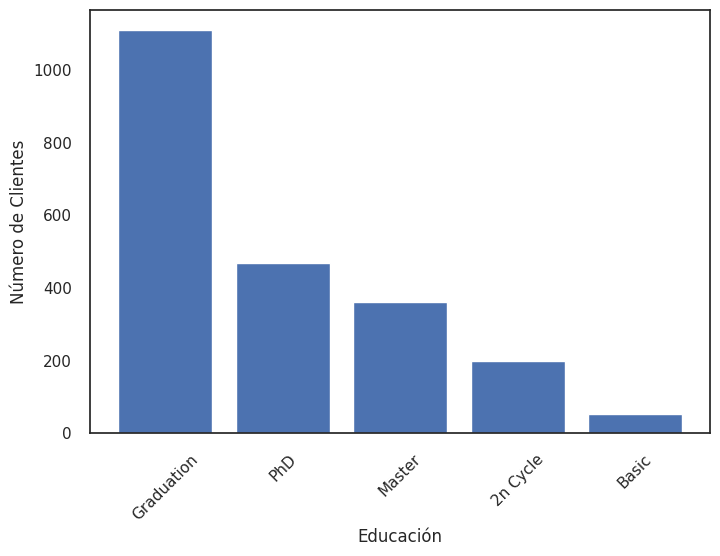

In [224]:
# Obtener la frecuencia de cada categoría
frecuencia_categorias = df['Education'].value_counts()

# Crear un gráfico de barras
plt.bar(frecuencia_categorias.index, frecuencia_categorias.values)
# Agregar etiquetas y título
plt.xlabel('Educación')
plt.ylabel('Número de Clientes')
# plt.title('Gráfico de barras de la columna categórica')
plt.xticks(rotation=45)  # Rotar los nombres de las categorías si es necesario
plt.show()

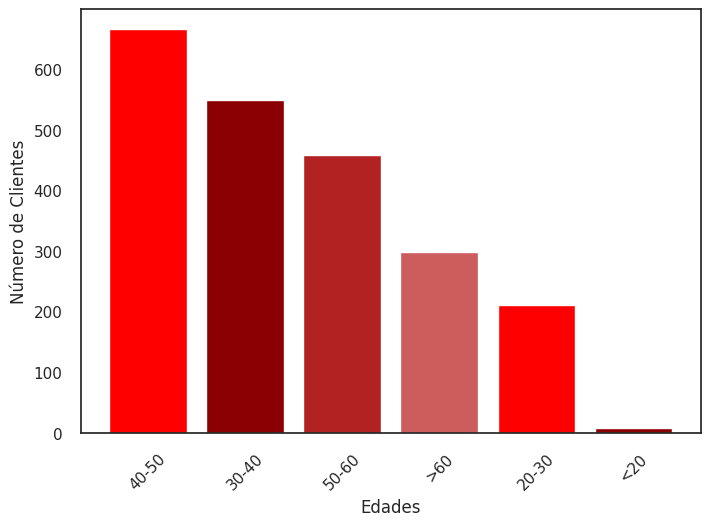

In [225]:
# Obtener la frecuencia de cada categoría
frecuencia_categorias = df['Rango_edad'].value_counts()

# Definir una lista de distintos tonos de rojo
tonos_rojo = ['red', 'darkred', 'firebrick', 'indianred']

# Crear un gráfico de barras con distintos tonos de rojo
plt.bar(frecuencia_categorias.index, frecuencia_categorias.values, color=tonos_rojo)

# Agregar etiquetas y título
plt.xlabel('Edades')
plt.ylabel('Número de Clientes')
# plt.title('Gráfico de barras de la columna categórica')
plt.xticks(rotation=45)  # Rotar los nombres de las categorías si es necesario
plt.show()

In [226]:
# ager_df = df.groupby('agerange').agg({'agerange': lambda x : len(x)})
# ager_df.rename(columns={'agerange':'count'},inplace=True)
# ager_df.sort_values('count').plot(kind='bar',figsize=(10,5))
# plt.ylabel('count')
# plt.title('customers age group')

Cuántos clientes registrados tiene la empresa?

In [227]:
ID_diferentes = df.index.nunique()
print("Numero de clientes:", ID_diferentes)
num_clientes= ID_diferentes

Numero de clientes: 2189


Cómo es el perfil medio de los clientes que tiene la empresa?

In [228]:
def graficos_eda_categoricos(cat):

    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

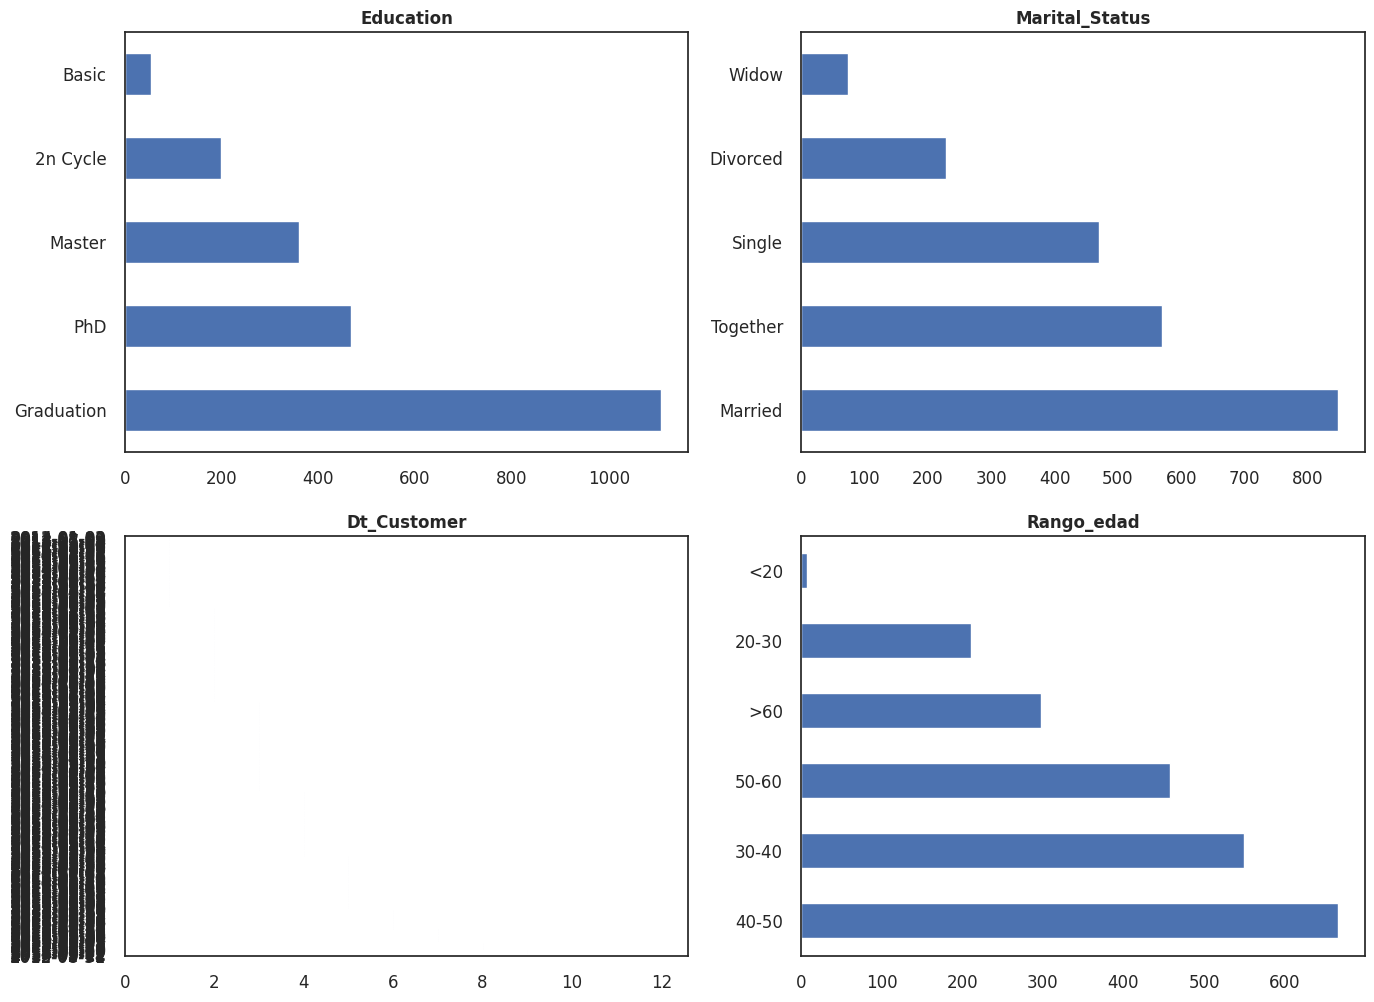

In [229]:
graficos_eda_categoricos(df.select_dtypes('O'))

Que porcentaje de clientes aceptaron alguna campaña?

In [230]:
campañas= ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']
Suma_cmp= df[campañas].sum()
# print(Suma_cmp)
suma_total = Suma_cmp.sum()
clientes_campañas= (suma_total/num_clientes) * 100
print(clientes_campañas)

29.64824120603015


ESTE CALCULO NO ESTA BIEN XQ UN CLIENTE PUEDE ACEPTAR MAS DE UNA CAMPAÑA, NO SE ME OCURRE COMO CALCULAR BIEN

Lo bueno es que ahora solo nos centramos en trabajar con el 30% de los clientes

(No estoy segura se ahora solo trabajar con un df con los clientes que ya aceptaron alguna campaña o mantener a todos)

Qué porcentaje de clientes aceptaron cada campaña?




In [231]:
df.AcceptedCmp1.value_counts(normalize = True) * 100

0    93.650069
1     6.349931
Name: AcceptedCmp1, dtype: float64

In [232]:
df.AcceptedCmp2.value_counts(normalize = True) * 100

0    98.629511
1     1.370489
Name: AcceptedCmp2, dtype: float64

In [233]:
df.AcceptedCmp3.value_counts(normalize = True) * 100

0    92.645043
1     7.354957
Name: AcceptedCmp3, dtype: float64

In [234]:
df.AcceptedCmp4.value_counts(normalize = True) * 100

0    92.59936
1     7.40064
Name: AcceptedCmp4, dtype: float64

In [235]:
df.AcceptedCmp5.value_counts(normalize = True) * 100

0    92.827775
1     7.172225
Name: AcceptedCmp5, dtype: float64

La campaña 4 fue la que tiene mayor porcentaje de aceptaciones

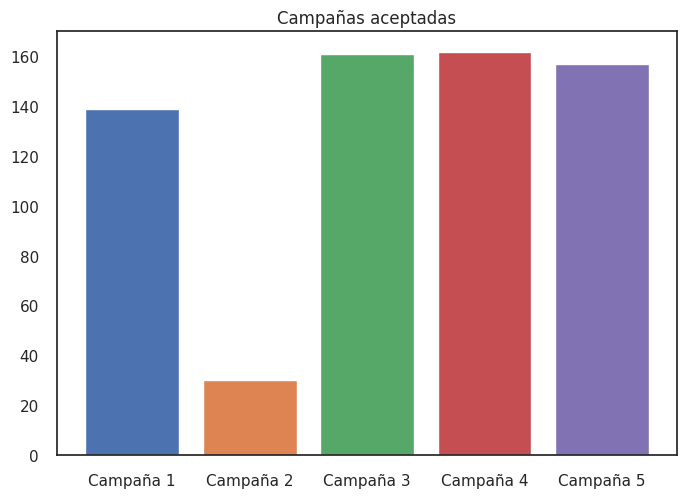

In [236]:
# Supongamos que tienes un DataFrame df y deseas sumar por separado las columnas 'Columna1', 'Columna2', 'Columna3', 'Columna4' y 'Columna5'
suma_columna1 = df['AcceptedCmp1'].sum()
suma_columna2 = df['AcceptedCmp2'].sum()
suma_columna3 = df['AcceptedCmp3'].sum()
suma_columna4 = df['AcceptedCmp4'].sum()
suma_columna5 = df['AcceptedCmp5'].sum()

colores = ['#FFA500', '#FFA500', '#FFA500', '#FFA500', '#FFA500']

# Crear un gráfico de barras para cada columna sumada por separado
plt.bar('Campaña 1', suma_columna1)
plt.bar('Campaña 2', suma_columna2)
plt.bar('Campaña 3', suma_columna3)
plt.bar('Campaña 4', suma_columna4)
plt.bar('Campaña 5', suma_columna5)

# Agregar etiquetas y título
# plt.xlabel('Campañas')
# plt.ylabel('Suma')
plt.title('Campañas aceptadas')
plt.show()

Porcentaje de clientes de aceptaron una campaña y la campaña anterior:

In [237]:
df.Response.value_counts(normalize = True) * 100

0    85.015989
1    14.984011
Name: Response, dtype: float64

Esto quiere decir que es más probable que un cliente acepte una campaña si ya aceptó alguna otra.

Que tipo de clientes aceptan las campañas?

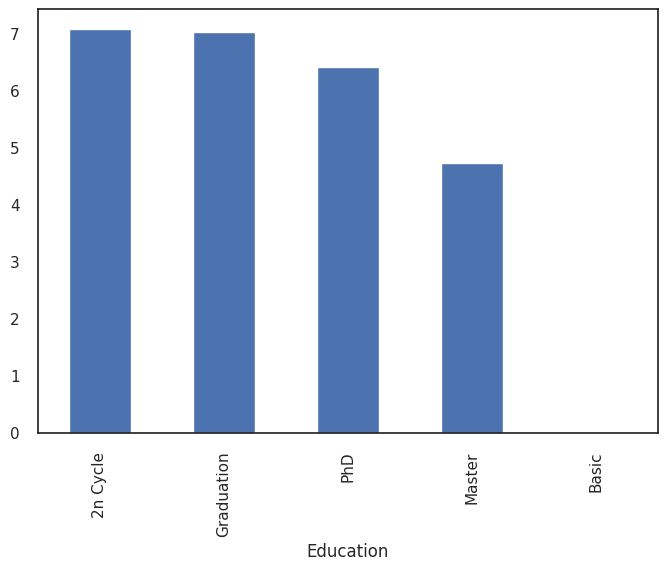

In [238]:
# Analisis por educación
temp = df.groupby('Education').AcceptedCmp1.mean().sort_values(ascending = False) * 100
temp.plot.bar();

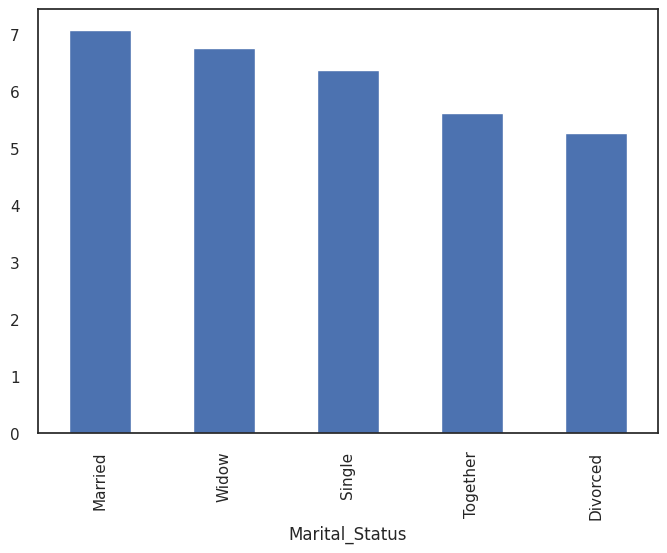

In [239]:
# Analisis por estado civil
temp = df.groupby('Marital_Status').AcceptedCmp1.mean().sort_values(ascending = False) * 100
temp.plot.bar();

No entiendo xq aparece absurd

Estudiamos con gráficas cuales caracteríasticas están más relacionadas a la aceptación de una campaña. Lo hacemos con la Campaña 4 que es la que más porcentaje de aceptación tiene

<ipython-input-240-69f4b1ea8256>:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-240-69f4b1ea8256>:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-240-69f4b1ea8256>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-240-69f4b1ea8256>:5: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-240-69f4b1ea8256>:6: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-240-69f4b1ea8256>:7: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



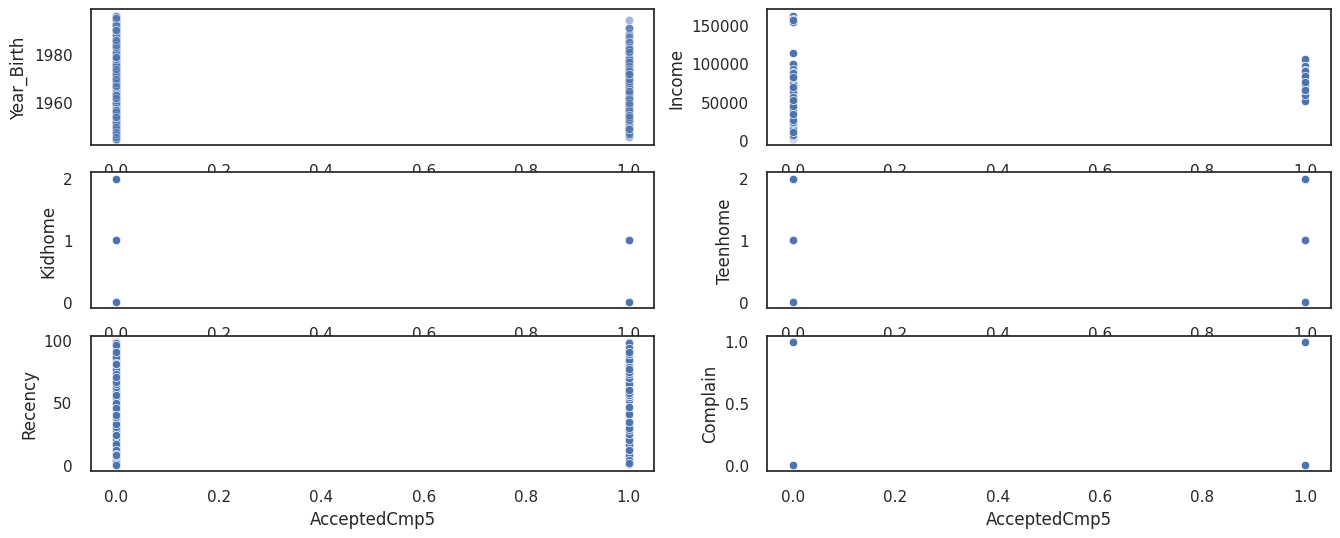

In [240]:
plt.figure(figsize=(16,6))
plt.subplot(321),  sns.scatterplot(data=df, x="AcceptedCmp4", y="Year_Birth" ,palette="viridis" , alpha=0.5)
plt.subplot(322), sns.scatterplot(data=df, x="AcceptedCmp5",  y="Income",palette="viridis")
plt.subplot(323), sns.scatterplot(data=df, x="AcceptedCmp5",  y="Kidhome",palette="viridis")
plt.subplot(324), sns.scatterplot(data=df, x="AcceptedCmp5",  y="Teenhome",palette="viridis")
plt.subplot(325), sns.scatterplot(data=df, x="AcceptedCmp5",  y="Recency",palette="viridis")
plt.subplot(326), sns.scatterplot(data=df, x="AcceptedCmp5",  y="Complain",palette="viridis")
plt.show()

La diferencia más notoria la encontramos con el "income". Solo aceptaron la campaña 4 personas con más ingresos.

<ipython-input-241-08a7a22000a6>:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-241-08a7a22000a6>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-241-08a7a22000a6>:5: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-241-08a7a22000a6>:6: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-241-08a7a22000a6>:7: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-241-08a7a22000a6>:8: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



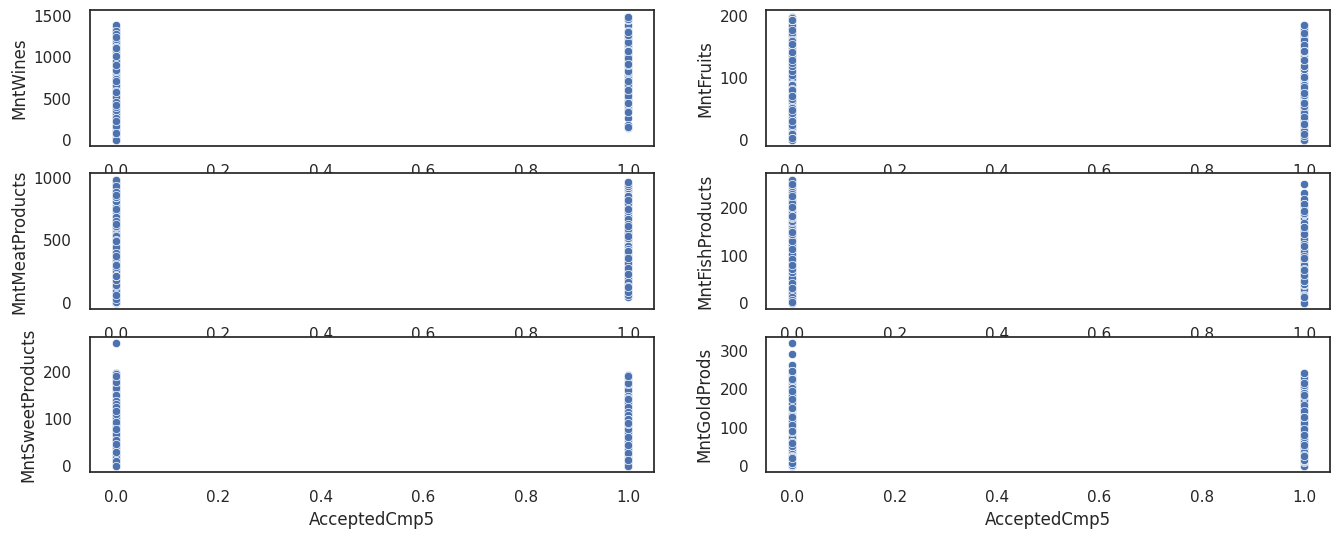

In [241]:
plt.figure(figsize=(16,6))

plt.subplot(321), sns.scatterplot(data=df, x="AcceptedCmp5",  y="MntWines",palette="viridis")
plt.subplot(322), sns.scatterplot(data=df, x="AcceptedCmp5",  y="MntFruits",palette="viridis")
plt.subplot(323), sns.scatterplot(data=df, x="AcceptedCmp5",  y="MntMeatProducts",palette="viridis")
plt.subplot(324), sns.scatterplot(data=df, x="AcceptedCmp5",  y="MntFishProducts",palette="viridis")
plt.subplot(325), sns.scatterplot(data=df, x="AcceptedCmp5",  y="MntSweetProducts",palette="viridis")
plt.subplot(326), sns.scatterplot(data=df, x="AcceptedCmp5",  y="MntGoldProds",palette="viridis")
plt.show()

In [242]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'edad', 'Rango_edad'],
      dtype='object')

<ipython-input-243-f2806e426c1a>:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-243-f2806e426c1a>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-243-f2806e426c1a>:5: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-243-f2806e426c1a>:6: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



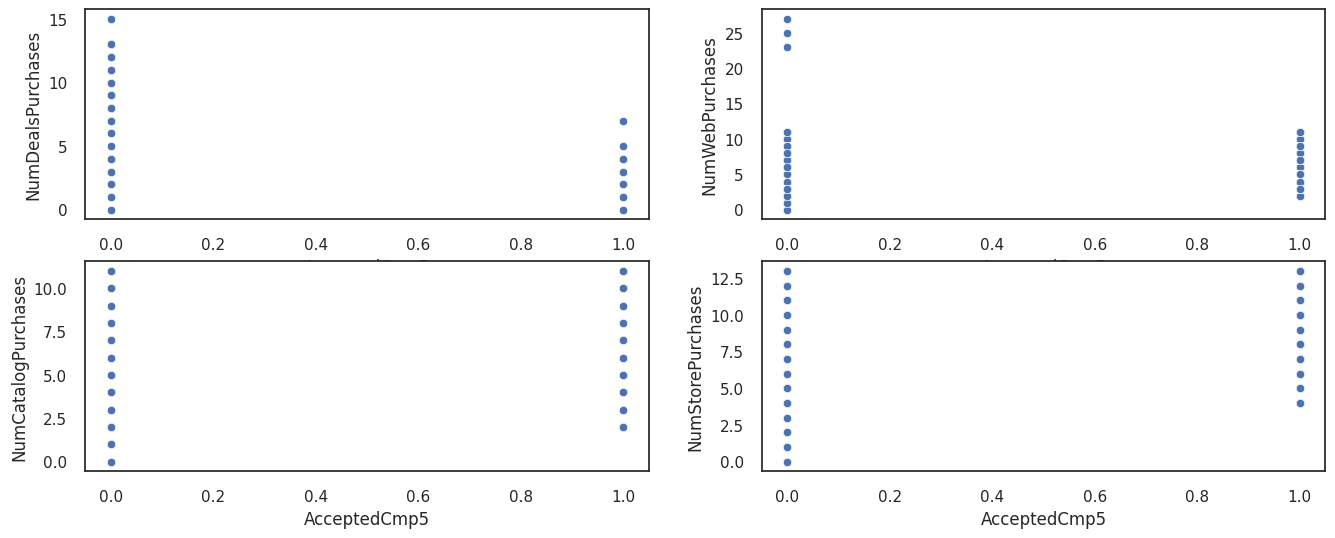

In [243]:
plt.figure(figsize=(16,6))

plt.subplot(221), sns.scatterplot(data=df, x="AcceptedCmp5",  y="NumDealsPurchases",palette="viridis")
plt.subplot(222), sns.scatterplot(data=df, x="AcceptedCmp5",  y="NumWebPurchases",palette="viridis")
plt.subplot(223), sns.scatterplot(data=df, x="AcceptedCmp5",  y="NumCatalogPurchases",palette="viridis")
plt.subplot(224), sns.scatterplot(data=df, x="AcceptedCmp5",  y="NumStorePurchases",palette="viridis")
plt.show()

Sin dudas el parámetro que más distingue la aceptación o no de los clientes a una campaña son sus ingresos.

Podríamos intentar ver que pasa en cada campaña en relación a los ingresos.

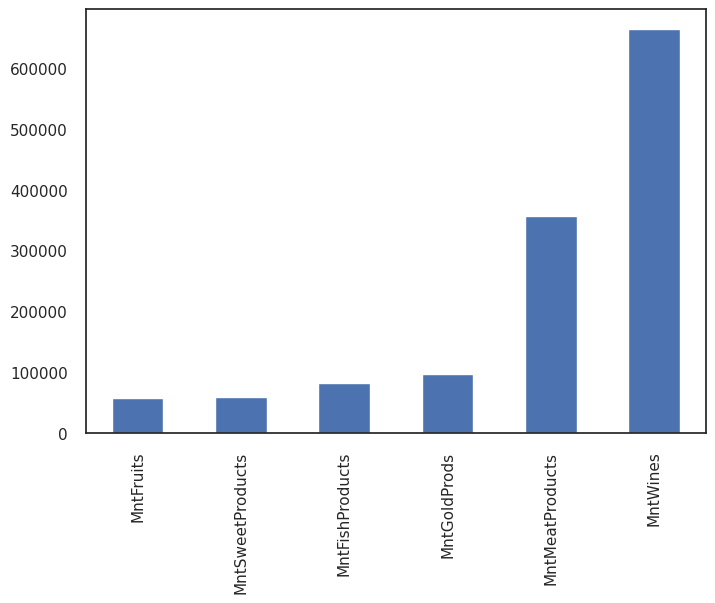

MntFruits            57434
MntSweetProducts     59320
MntFishProducts      81611
MntGoldProds         96328
MntMeatProducts     357800
MntWines            664559
dtype: int64

In [244]:
#sum up the values in each product
product_df = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]
product_df.sum().sort_values().plot(kind='bar')
plt.show()
product_df.sum().sort_values()

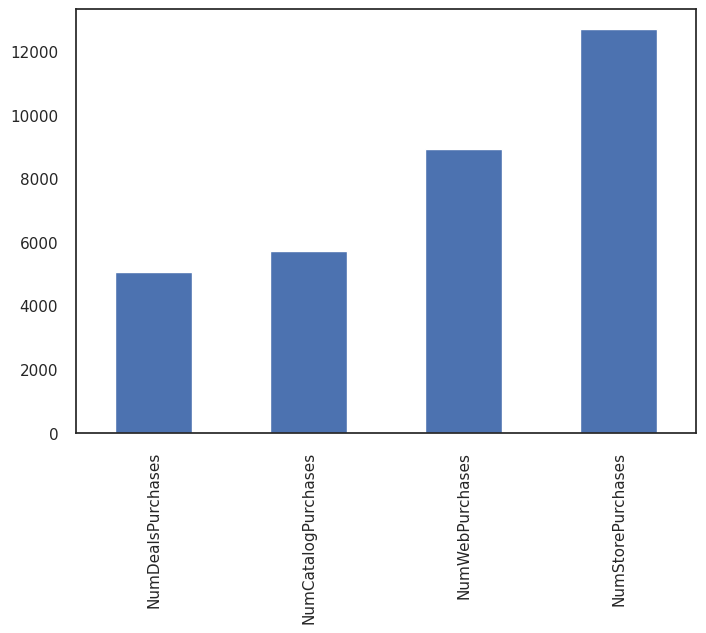

NumDealsPurchases       5065
NumCatalogPurchases     5709
NumWebPurchases         8934
NumStorePurchases      12700
dtype: int64

In [245]:
#sum up the values in each product
channel_df = df[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']]
channel_df.sum().sort_values().plot(kind='bar')
plt.show()
channel_df.sum().sort_values()

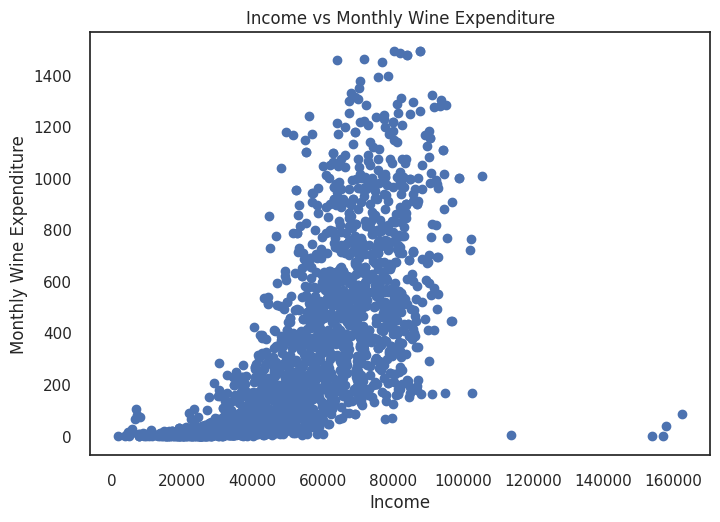

In [246]:
plt.scatter(df["Income"], df["MntWines"])
plt.xlabel("Income")
plt.ylabel("Monthly Wine Expenditure")
plt.title("Income vs Monthly Wine Expenditure")
plt.show()

## Perfil de clientes que aceptaron alguna campaña

In [247]:
# Dejo un df con toda la info
df_j=df.copy

df1 = df[df['AcceptedCmp1'] == 1]
df2 = df[df['AcceptedCmp2'] == 1]
df3 = df[df['AcceptedCmp3'] == 1]
df4 = df[df['AcceptedCmp4'] == 1]
df5 = df[df['AcceptedCmp5'] == 1]

df_camp= pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

#ver si hay datos duplicados
df_camp.duplicated().sum()

# Los elimino y me quedo con la primera ocurrencia.
df_camp.drop_duplicates(inplace=True)
df_camp.duplicated().sum()

0

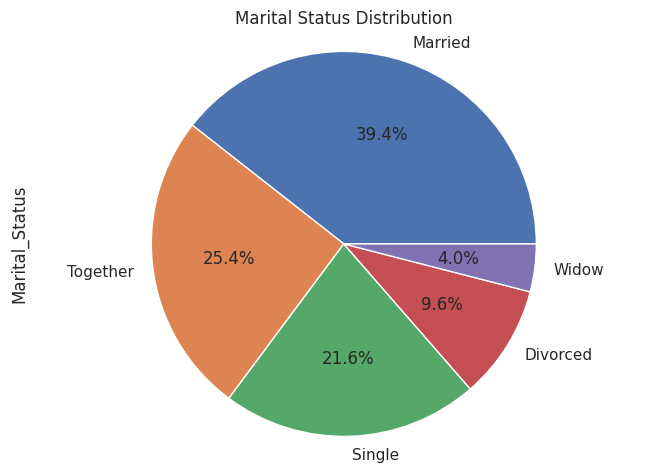

In [248]:
#Pie chart
df_camp["Marital_Status"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.axis("equal")
plt.title("Marital Status Distribution")
plt.show()

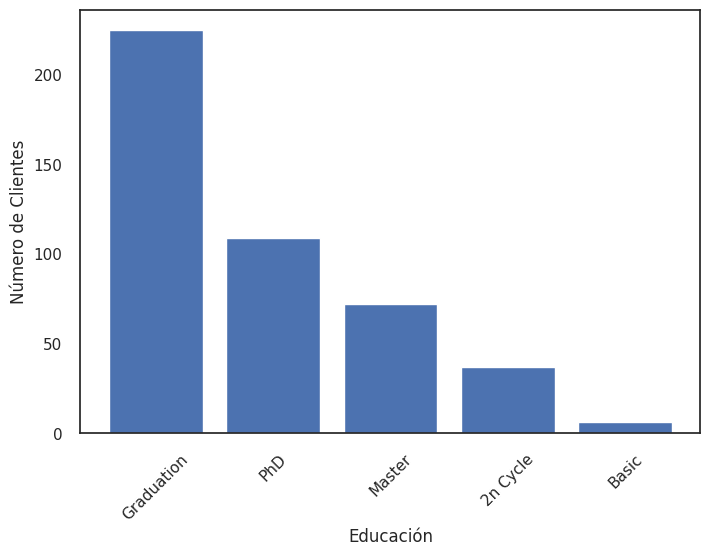

In [249]:
# Obtener la frecuencia de cada categoría
frecuencia_categorias = df_camp['Education'].value_counts()

# Crear un gráfico de barras
plt.bar(frecuencia_categorias.index, frecuencia_categorias.values)
# Agregar etiquetas y título
plt.xlabel('Educación')
plt.ylabel('Número de Clientes')
# plt.title('Gráfico de barras de la columna categórica')
plt.xticks(rotation=45)  # Rotar los nombres de las categorías si es necesario
plt.show()

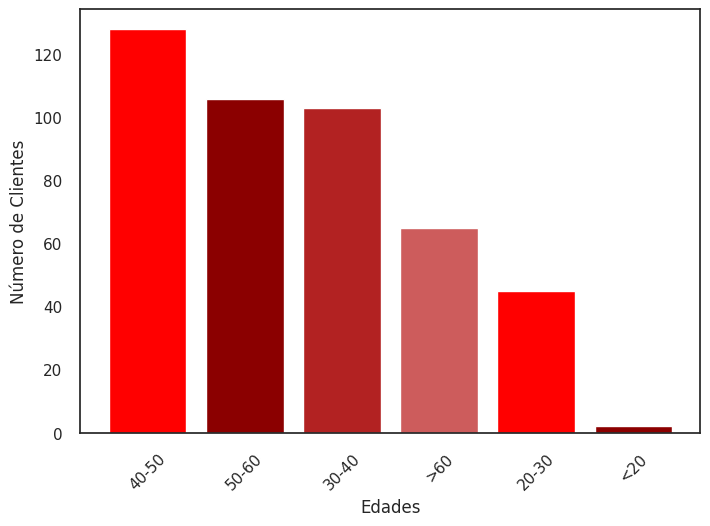

In [250]:
# Obtener la frecuencia de cada categoría
frecuencia_categorias = df_camp['Rango_edad'].value_counts()

# Definir una lista de distintos tonos de rojo
tonos_rojo = ['red', 'darkred', 'firebrick', 'indianred']

# Crear un gráfico de barras con distintos tonos de rojo
plt.bar(frecuencia_categorias.index, frecuencia_categorias.values, color=tonos_rojo)

# Agregar etiquetas y título
plt.xlabel('Edades')
plt.ylabel('Número de Clientes')
# plt.title('Gráfico de barras de la columna categórica')
plt.xticks(rotation=45)  # Rotar los nombres de las categorías si es necesario
plt.show()

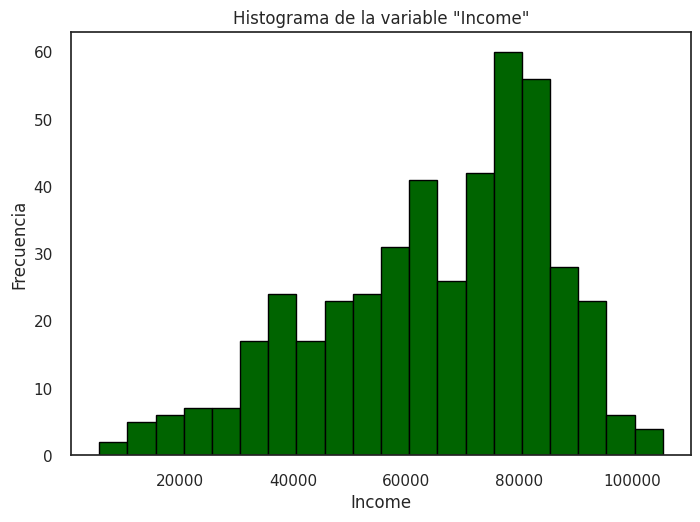

In [255]:
# Supongamos que tienes un DataFrame df con una columna llamada "Income"
income_data = df_camp['Income']

# Crear el histograma
plt.hist(income_data, bins=20, color='darkgreen', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Income')
plt.ylabel('Frecuencia')
plt.title('Histograma de la variable "Income"')

# Mostrar el histograma
plt.show()

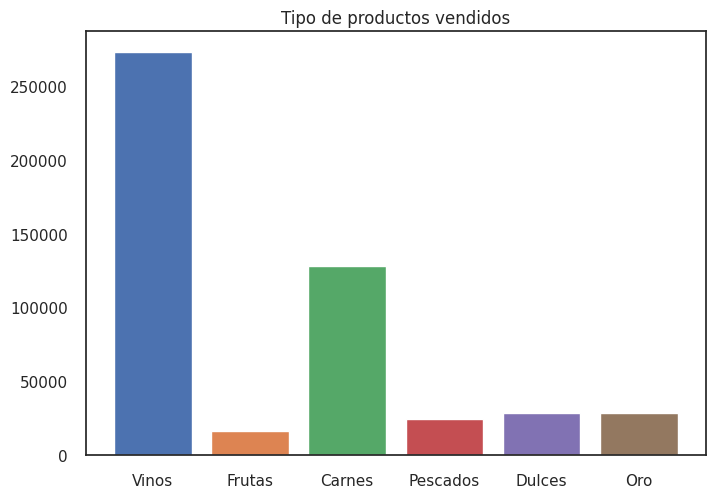

In [263]:
# Supongamos que tienes un DataFrame df y deseas sumar por separado las columnas 'Columna1', 'Columna2', 'Columna3', 'Columna4' y 'Columna5'
suma_columna1 = df_camp['MntWines'].sum()
suma_columna2 = df_camp['MntFruits'].sum()
suma_columna3 = df_camp['MntMeatProducts'].sum()
suma_columna4 = df_camp['MntFishProducts'].sum()
suma_columna5 = df_camp['MntSweetProducts'].sum()
suma_columna5 = df_camp['MntGoldProds'].sum()

colores = ['#FFA500', '#FFA500', '#FFA500', '#FFA500', '#FFA500']

# Crear un gráfico de barras para cada columna sumada por separado
plt.bar('Vinos', suma_columna1)
plt.bar('Frutas', suma_columna2)
plt.bar('Carnes', suma_columna3)
plt.bar('Pescados', suma_columna4)
plt.bar('Dulces', suma_columna5)
plt.bar('Oro', suma_columna5)

# Agregar etiquetas y título
# plt.xlabel('Campañas')
# plt.ylabel('Suma')
plt.title('Tipo de productos vendidos')
plt.show()

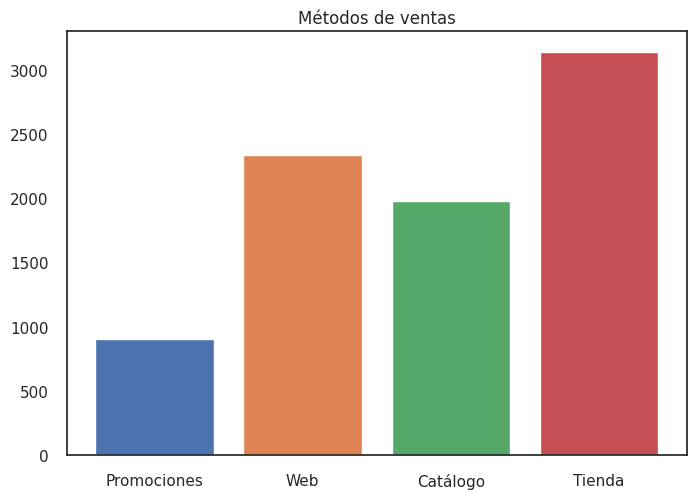

In [267]:
# Supongamos que tienes un DataFrame df y deseas sumar por separado las columnas 'Columna1', 'Columna2', 'Columna3', 'Columna4' y 'Columna5'
suma_columna1 = df_camp['NumDealsPurchases'].sum()
suma_columna2 = df_camp['NumWebPurchases'].sum()
suma_columna3 = df_camp['NumCatalogPurchases'].sum()
suma_columna4 = df_camp['NumStorePurchases'].sum()

colores = ['#FFA500', '#FFA500', '#FFA500', '#FFA500', '#FFA500']

# Crear un gráfico de barras para cada columna sumada por separado
plt.bar('Promociones', suma_columna1)
plt.bar('Web', suma_columna2)
plt.bar('Catálogo', suma_columna3)
plt.bar('Tienda', suma_columna4)

# Agregar etiquetas y título
# plt.xlabel('Campañas')
# plt.ylabel('Suma')
plt.title('Métodos de ventas')
plt.show()

## Tipos de productos comprados

In [ ]:
# Supongamos que tienes un DataFrame df y deseas sumar por separado las columnas 'Columna1', 'Columna2', 'Columna3', 'Columna4' y 'Columna5'
suma_columna1 = df['MntWines'].sum()
suma_columna2 = df['MntFruits'].sum()
suma_columna3 = df['MntMeatProducts'].sum()
suma_columna4 = df['MntFishProducts'].sum()
suma_columna5 = df['MntSweetProducts'].sum()
suma_columna5 = df['MntGoldProds'].sum()

colores = ['#FFA500', '#FFA500', '#FFA500', '#FFA500', '#FFA500']

# Crear un gráfico de barras para cada columna sumada por separado
plt.bar('Vinos', suma_columna1)
plt.bar('Frutas', suma_columna2)
plt.bar('Carnes', suma_columna3)
plt.bar('Pescados', suma_columna4)
plt.bar('Dulces', suma_columna5)
plt.bar('Oro', suma_columna5)

# Agregar etiquetas y título
# plt.xlabel('Campañas')
# plt.ylabel('Suma')
plt.title('Tipo de productos vendidos')
plt.show()

## Métodos de ventas

In [265]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'edad', 'Rango_edad'],
      dtype='object')

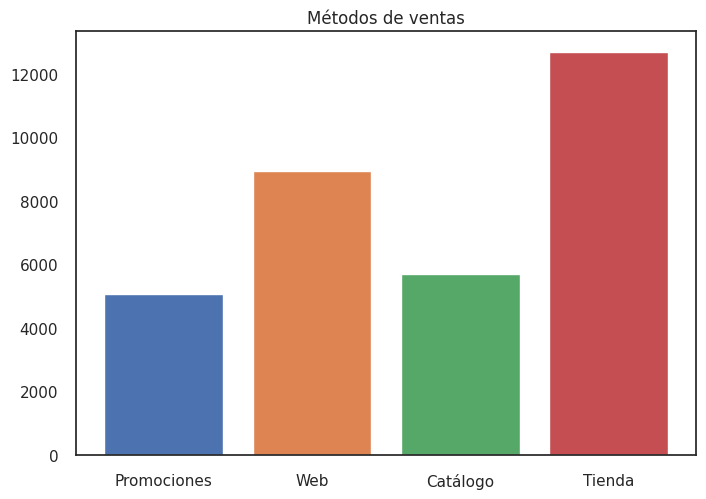

In [266]:
# Supongamos que tienes un DataFrame df y deseas sumar por separado las columnas 'Columna1', 'Columna2', 'Columna3', 'Columna4' y 'Columna5'
suma_columna1 = df['NumDealsPurchases'].sum()
suma_columna2 = df['NumWebPurchases'].sum()
suma_columna3 = df['NumCatalogPurchases'].sum()
suma_columna4 = df['NumStorePurchases'].sum()

colores = ['#FFA500', '#FFA500', '#FFA500', '#FFA500', '#FFA500']

# Crear un gráfico de barras para cada columna sumada por separado
plt.bar('Promociones', suma_columna1)
plt.bar('Web', suma_columna2)
plt.bar('Catálogo', suma_columna3)
plt.bar('Tienda', suma_columna4)

# Agregar etiquetas y título
# plt.xlabel('Campañas')
# plt.ylabel('Suma')
plt.title('Métodos de ventas')
plt.show()

# Categóricas a numéricas

In [ ]:
# df_j=df.copy

In [ ]:
# df.columns

In [ ]:
# df['Marital_Status'].value_counts()

In [ ]:
# df['Education'].value_counts()

In [268]:
# Categóricas a numéricas

df = pd.get_dummies(df, columns=['Marital_Status'])
df = pd.get_dummies(df, columns=['Education'])

df.drop('Rango_edad', axis=1, inplace=True)
df.drop('Year_Birth', axis=1, inplace=True)

In [269]:
df.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'edad', 'Rango_edad', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow', 'Education_2n Cycle',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD'],
      dtype='object')

In [276]:
df.columns

Index(['ID', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'edad',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Education_2n Cycle', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD'],
      dtype='object')

In [275]:
df.drop('Rango_edad', axis=1, inplace=True)
df.drop('Year_Birth', axis=1, inplace=True)
# df.drop('Dt_Customer', axis=1, inplace=True)
# df.drop('agerange', axis=1, inplace=True)

# Filtro mi base de datos

Solo dejo los clientes que aceptaron una o más campañas

(Lo único q se me ocurre hacer es separar en los que si aceptaron cada una de las campañas, lugos concatenar y al final eliminar las repetidas)

In [ ]:
# Dejo un df con toda la info
df_j=df.copy

df1 = df[df['AcceptedCmp1'] == 1]
df2 = df[df['AcceptedCmp2'] == 1]
df3 = df[df['AcceptedCmp3'] == 1]
df4 = df[df['AcceptedCmp4'] == 1]
df5 = df[df['AcceptedCmp5'] == 1]

df= pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

#ver si hay datos duplicados
df.duplicated().sum()

# Los elimino y me quedo con la primera ocurrencia.
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Quiero ahora hacer una matriz correlación para ver como cambió con el filtro en la base de datos

<ipython-input-259-348ed484693b>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



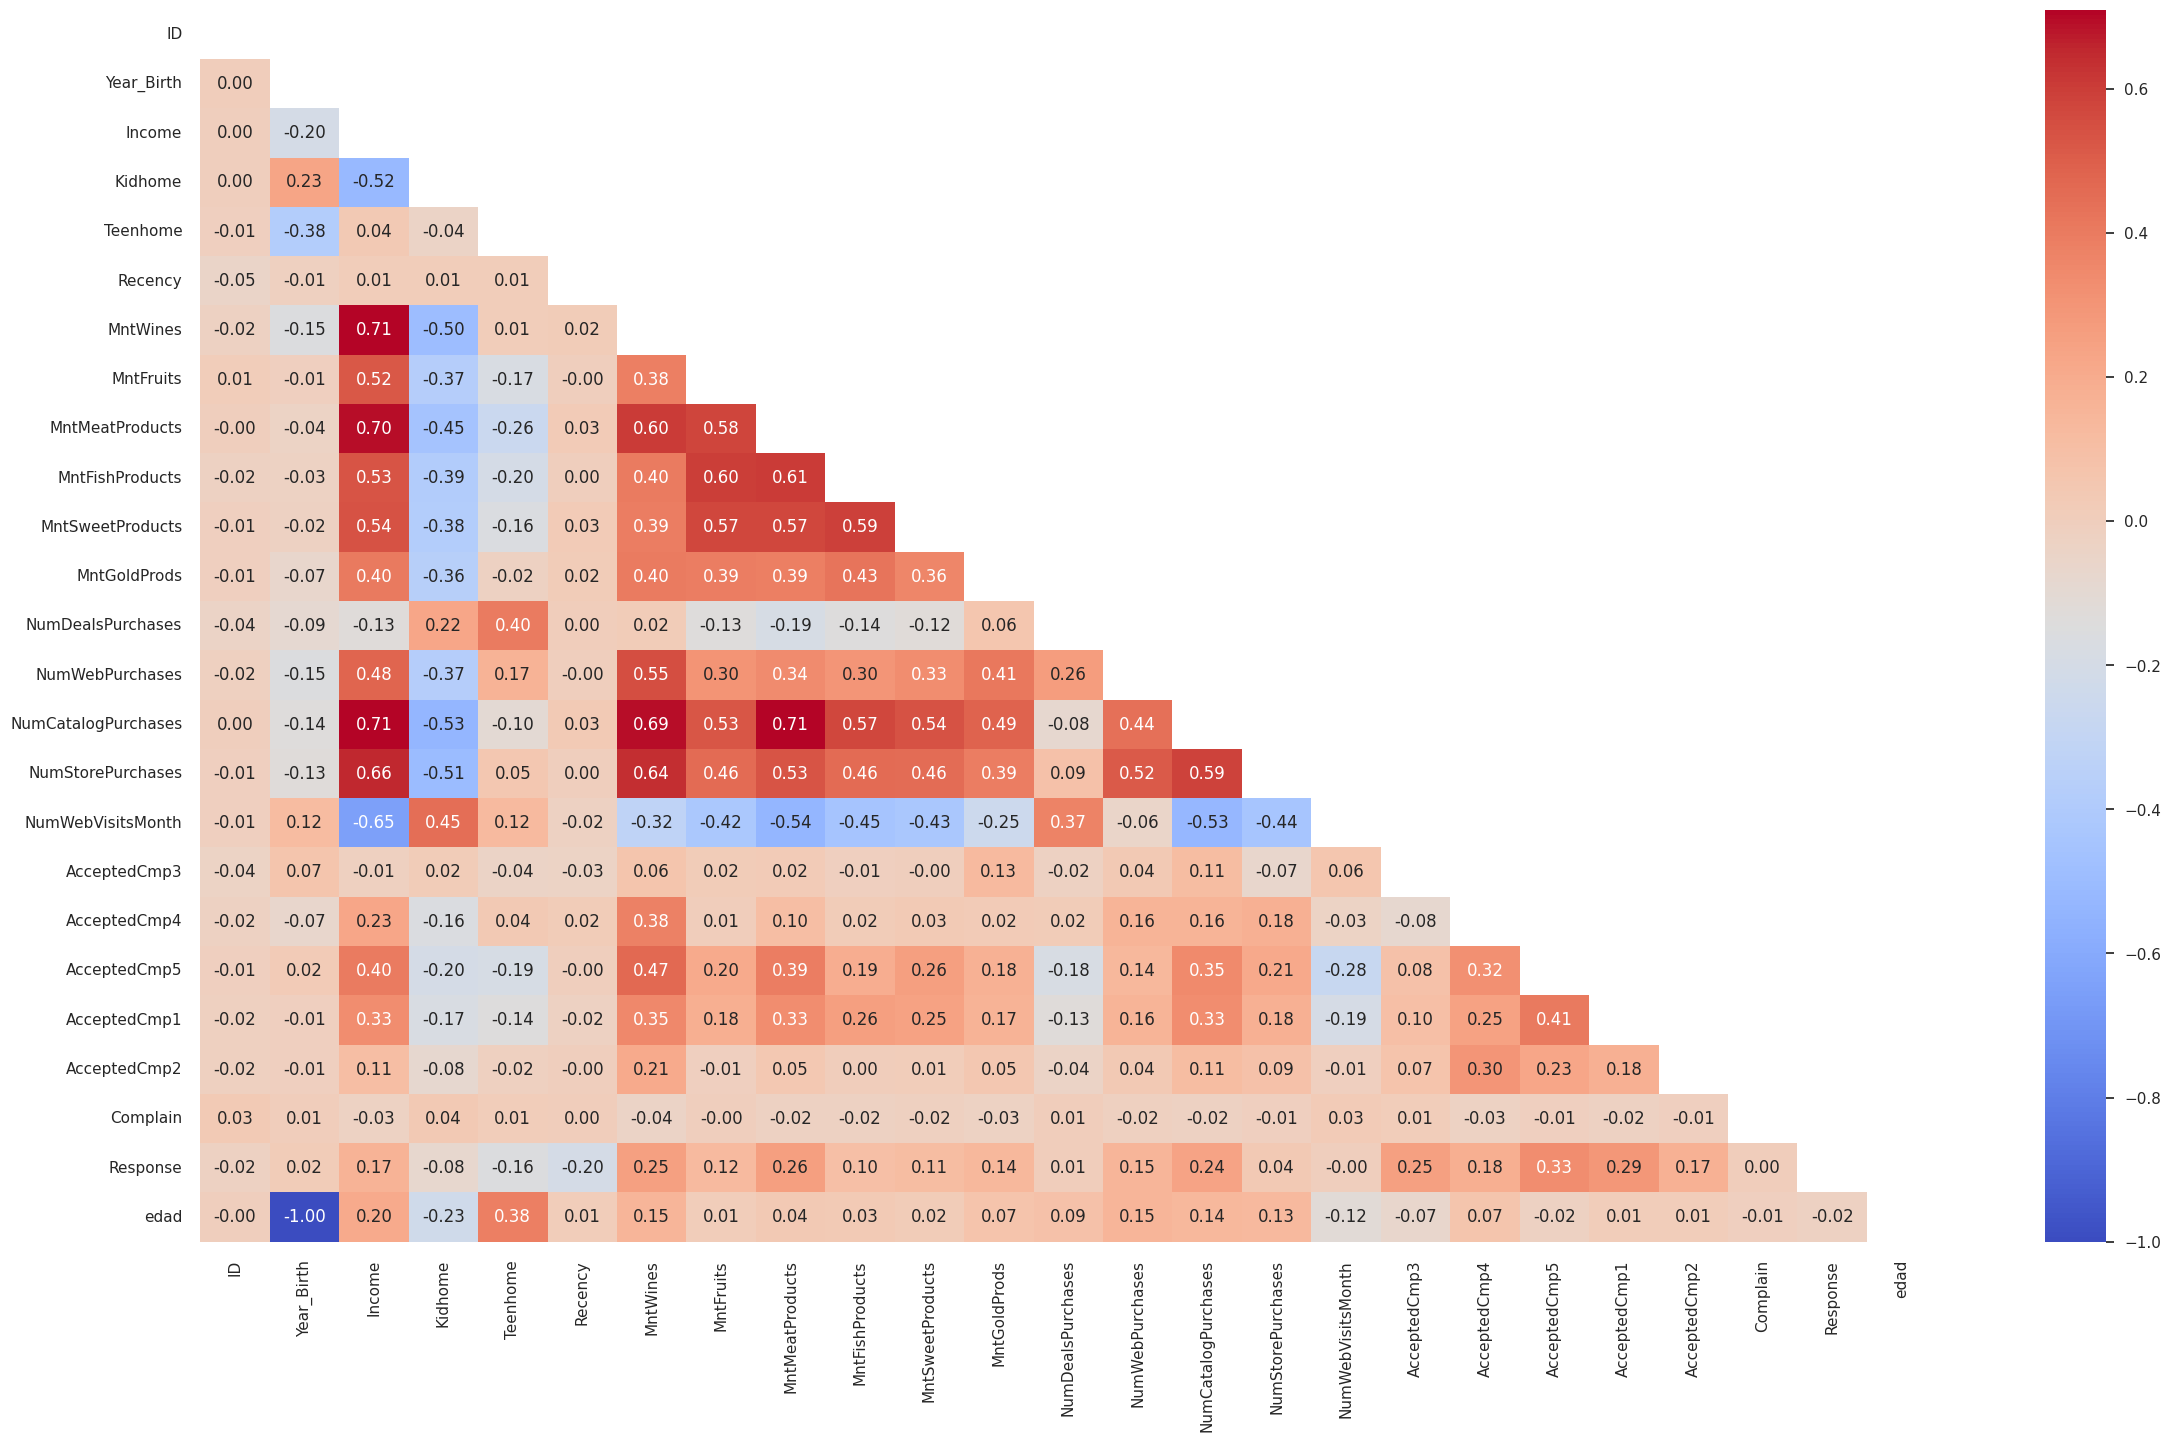

In [259]:
matriz_correlacion = df.corr()

# Crear un mapa de calor utilizando seaborn
sns.set(style="white")  # Configuración del estilo
mask = np.triu(np.ones_like(matriz_correlacion, dtype=bool))  # Máscara triangular superior

# Configurar el tamaño de la figura
plt.figure(figsize=(28, 16))

# Crear el mapa de calor
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)

# Mostrar el mapa de calor
plt.show()

Claramente las correlaciones relacionadas a las campañas mejoraron y curiosamente las relacionadas a "income" también.